In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_train = pd.read_csv("./data/movies_train.csv")

In [3]:
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [4]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


C:\Users\odinare\AppData\Local\Temp\ipykernel_36488\1319869048.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movie_train.corr()


<Axes: >

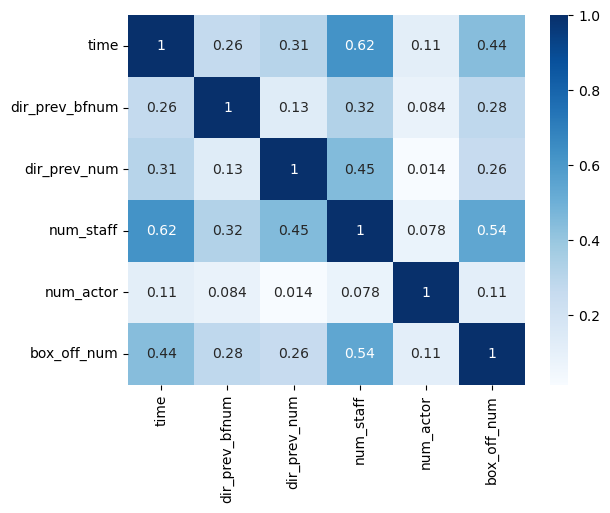

In [5]:
corr_matrix = movie_train.corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

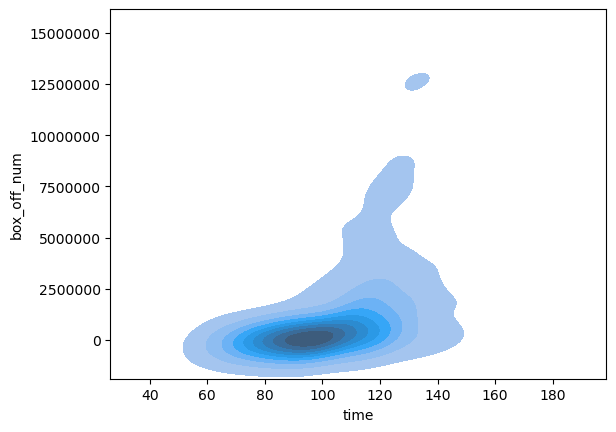

In [6]:
ax = sns.kdeplot(data = movie_train,
                x = "time",
                y = "box_off_num",
                fill = True)
ax.set_xlabel("time")
ax.set_ylabel("box_off_num")
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [7]:
movie_train["box_off_num"]

0        23398
1      7072501
2      6959083
3       217866
4       483387
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 600, dtype: int64

In [8]:
distributor_num = movie_train[["distributor", "box_off_num"]].groupby("distributor", as_index = False).mean()
distributor_num

,distributor,box_off_num
0,(주) 브릿지웍스,3598.333333
1,(주) 액티버스엔터테인먼트,610.000000
2,(주) 영화사조제,6771.800000
3,(주) 영화제작전원사,46513.333333
4,(주) 케이알씨지,1027.285714
...,...,...
164,필름라인,5100.000000
165,하준사,600.000000
166,한국YWCA연합회,71.000000
167,홀리가든,1721.500000


In [9]:
movie_train[movie_train["distributor"] == "한국YWCA연합회"]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
428,한민족 그리고 조선족,한국YWCA연합회,다큐멘터리,2014-12-10,61,전체 관람가,전화성,345.333333,3,2,6,71


In [10]:
movie_train["dir_prev_bfnum"].fillna(0, inplace = True)

In [11]:
onehot = pd.get_dummies(movie_train[["distributor", "genre", "release_time", "screening_rat", "director"]], dtype = int)

In [12]:
df = pd.concat([movie_train, onehot], axis = 1)

In [13]:
rdf = df.drop(["distributor", "genre", "release_time", "screening_rat", "director","dir_prev_bfnum"], axis = 1)

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(df[["time", "dir_prev_num", "num_staff", "num_actor"]])

In [15]:
rdf[["time", "dir_prev_num", "num_staff", "num_actor"]] = scaled_df

In [16]:
rdf

,title,time,dir_prev_num,num_staff,num_actor,box_off_num,distributor_(주) 브릿지웍스,distributor_(주) 액티버스엔터테인먼트,distributor_(주) 영화사조제,distributor_(주) 영화제작전원사,...,director_홍원찬,director_홍재희,director_홍지영,director_황동혁,director_황병국,director_황석호,director_황욱,director_황유식,director_황인호,director_황철민
0,개들의 전쟁,-0.268953,-0.741416,-0.363216,-0.698066,23398,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,내부자들,1.611324,0.950027,1.425124,-0.289043,7072501,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,1.224208,2.641471,1.159290,0.119980,6959083,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,나는 공무원이다,0.007558,0.950027,-0.792176,0.938026,217866,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,불량남녀,0.394674,0.104306,0.603454,-0.698066,483387,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,0.560581,0.104306,2.168252,1.347050,1475091,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,파파로티,1.445417,0.104306,0.814913,0.938026,1716438,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,살인의 강,-0.103047,-0.741416,-0.169882,0.119980,2475,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,악의 연대기,0.062860,-0.741416,1.690959,0.119980,2192525,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = rdf.drop(["title", "box_off_num"], axis = 1)
y = rdf["box_off_num"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
x_train.shape, y_train.shape

((480, 991), (480,))

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

1.0
0.20048556975894405


In [24]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [25]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [27]:
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))

0.5360704723487408
0.32651817130009864


In [31]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()

In [32]:
logi.fit(x_train, y_train)

LogisticRegression()

In [33]:
print(logi.score(x_train, y_train))
print(logi.score(x_test, y_test))

1.0
0.008333333333333333


In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [35]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 7)

In [36]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=7)

In [37]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

1.0
0.008333333333333333
